In [27]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [29]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [30]:
coordinates

[(26.751694972573688, -48.68185116048758),
 (-13.317346500754383, 17.51491325770661),
 (79.10445730077254, 83.77494227320432),
 (-62.532374210596636, -103.03643040279991),
 (-54.76568568935656, -129.00947786179552),
 (43.818317365488156, -137.23551487454645),
 (21.35688678781348, -171.5800116415907),
 (-31.837272674592484, 40.71175501866867),
 (-62.6571913758211, -74.84135581530175),
 (-26.81314639458541, -92.03358954691214),
 (62.78202653517499, 66.16589699737347),
 (64.51022390999995, 76.33711615497998),
 (46.06045746189204, -132.2050272484887),
 (70.20553540837756, 124.51751602507676),
 (50.95867050248151, 149.3166445002763),
 (64.11719198841709, -121.85573664977312),
 (-23.605110174492097, -48.40031467165471),
 (26.743310413388173, -169.1472877685891),
 (-46.985087873743396, 65.45114028878564),
 (-48.11548257947587, 166.46107311647853),
 (74.0426013977675, -17.249775530546003),
 (36.28548017122158, -122.6823824274338),
 (22.29414419036884, 49.05072013893036),
 (-75.62232256540005, 

In [31]:
from citipy import citipy

In [32]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [33]:
import requests
from config import weather_api_key

In [34]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [35]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [36]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [37]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [38]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | codrington
Processing Record 2 of Set 13 | kuito
Processing Record 3 of Set 13 | dikson
Processing Record 4 of Set 13 | punta arenas
Processing Record 5 of Set 13 | rikitea
Processing Record 6 of Set 13 | port hardy
Processing Record 7 of Set 13 | kapaa
Processing Record 8 of Set 13 | beloha
Processing Record 9 of Set 13 | ushuaia
Processing Record 10 of Set 13 | marcona
City not found. Skipping...
Processing Record 11 of Set 13 | oktyabrskoye
Processing Record 12 of Set 13 | gubkinskiy
Processing Record 13 of Set 13 | zhigansk
Processing Record 14 of Set 13 | vostok
Processing Record 15 of Set 13 | norman wells
Processing Record 16 of Set 13 | angatuba
Processing Record 17 of Set 13 | saint-philippe
Processing Record 18 of Set 13 | tuatapere
Processing Record 19 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 13 | pacific grove
Processing Record 21 of Set 13 | abu samrah
Processing Record 22 of Set 13 | hobart
Proces

Processing Record 36 of Set 16 | bethel
Processing Record 37 of Set 16 | avera
Processing Record 38 of Set 16 | havoysund
Processing Record 39 of Set 16 | chuy
Processing Record 40 of Set 16 | nador
Processing Record 41 of Set 16 | ntoum
Processing Record 42 of Set 16 | castro
Processing Record 43 of Set 16 | hashtrud
Processing Record 44 of Set 16 | beringovskiy
Processing Record 45 of Set 16 | yinchuan
Processing Record 46 of Set 16 | kesteren
Processing Record 47 of Set 16 | fort nelson
Processing Record 48 of Set 16 | karasburg
Processing Record 49 of Set 16 | yeppoon
Processing Record 50 of Set 16 | severnyy
Processing Record 1 of Set 17 | tezpur
Processing Record 2 of Set 17 | manzhouli
Processing Record 3 of Set 17 | destin
Processing Record 4 of Set 17 | greencastle
Processing Record 5 of Set 17 | nenjiang
Processing Record 6 of Set 17 | port elizabeth
Processing Record 7 of Set 17 | verkhnyaya inta
Processing Record 8 of Set 17 | eyl
Processing Record 9 of Set 17 | fortuna
Pro

Processing Record 22 of Set 20 | deputatskiy
Processing Record 23 of Set 20 | cockburn town
Processing Record 24 of Set 20 | ilulissat
Processing Record 25 of Set 20 | romny
Processing Record 26 of Set 20 | jumla
Processing Record 27 of Set 20 | belmonte
Processing Record 28 of Set 20 | nizhniy baskunchak
Processing Record 29 of Set 20 | raga
Processing Record 30 of Set 20 | attawapiskat
City not found. Skipping...
Processing Record 31 of Set 20 | vila franca do campo
Processing Record 32 of Set 20 | lasa
Processing Record 33 of Set 20 | buchanan
Processing Record 34 of Set 20 | baykit
Processing Record 35 of Set 20 | ust-koksa
Processing Record 36 of Set 20 | biak
Processing Record 37 of Set 20 | laguna
Processing Record 38 of Set 20 | puerto baquerizo moreno
Processing Record 39 of Set 20 | murdochville
Processing Record 40 of Set 20 | wajir
Processing Record 41 of Set 20 | dharchula
Processing Record 42 of Set 20 | helong
Processing Record 43 of Set 20 | san quintin
Processing Recor

Processing Record 6 of Set 24 | santa maria
Processing Record 7 of Set 24 | natitingou
Processing Record 8 of Set 24 | big spring
Processing Record 9 of Set 24 | ostrovnoy
Processing Record 10 of Set 24 | la puebla de cazalla
Processing Record 11 of Set 24 | adrar
Processing Record 12 of Set 24 | hammerfest
Processing Record 13 of Set 24 | trinidad
Processing Record 14 of Set 24 | hemnesberget
Processing Record 15 of Set 24 | pathein
Processing Record 16 of Set 24 | nemuro
Processing Record 17 of Set 24 | san luis
Processing Record 18 of Set 24 | kapoeta
Processing Record 19 of Set 24 | agua verde
Processing Record 20 of Set 24 | kutum
Processing Record 21 of Set 24 | paciran
Processing Record 22 of Set 24 | kidal
Processing Record 23 of Set 24 | dongning
Processing Record 24 of Set 24 | bouar
Processing Record 25 of Set 24 | asuncion
Processing Record 26 of Set 24 | podbrdo
Processing Record 27 of Set 24 | arequipa
Processing Record 28 of Set 24 | mozhaysk
Processing Record 29 of Set 

In [39]:
len(city_data)

582

In [40]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Codrington,-38.2667,141.9667,46.33,80,41,20.27,AU,2021-09-19 19:26:27
1,Kuito,-12.3833,16.9333,63.66,77,85,2.62,AO,2021-09-19 19:26:27
2,Dikson,73.5069,80.5464,36.41,86,100,18.41,RU,2021-09-19 19:26:27
3,Punta Arenas,-53.1500,-70.9167,50.11,57,75,31.07,CL,2021-09-19 19:26:28
4,Rikitea,-23.1203,-134.9692,73.72,75,0,11.92,PF,2021-09-19 19:26:28
5,Port Hardy,50.6996,-127.4199,55.58,94,75,13.80,CA,2021-09-19 19:26:28
6,Kapaa,22.0752,-159.3190,76.98,79,90,1.01,US,2021-09-19 19:26:29
7,Beloha,-25.1667,45.0500,60.80,71,0,10.29,MG,2021-09-19 19:26:29
8,Ushuaia,-54.8000,-68.3000,51.46,43,75,14.97,AR,2021-09-19 19:24:11
9,Oktyabrskoye,43.0645,44.7417,55.54,94,94,2.24,RU,2021-09-19 19:26:29


In [41]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_new = city_data_df[new_column_order]
city_data_new.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Codrington,AU,2021-09-19 19:26:27,-38.2667,141.9667,46.33,80,41,20.27
1,Kuito,AO,2021-09-19 19:26:27,-12.3833,16.9333,63.66,77,85,2.62
2,Dikson,RU,2021-09-19 19:26:27,73.5069,80.5464,36.41,86,100,18.41
3,Punta Arenas,CL,2021-09-19 19:26:28,-53.1500,-70.9167,50.11,57,75,31.07
4,Rikitea,PF,2021-09-19 19:26:28,-23.1203,-134.9692,73.72,75,0,11.92


In [42]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_new.to_csv(output_data_file, index_label="City_ID")

In [43]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

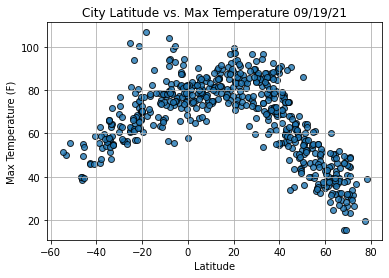

In [44]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

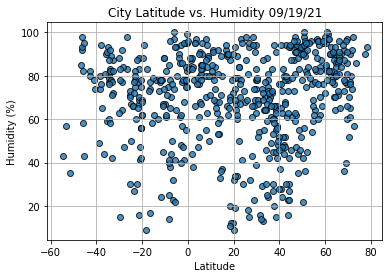

In [45]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

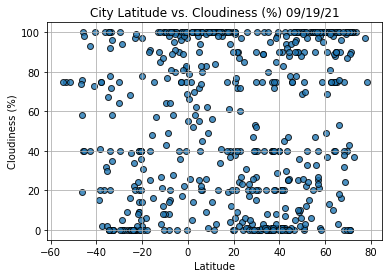

In [46]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


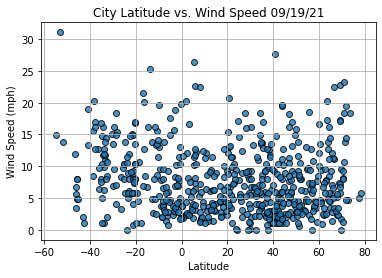

In [47]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [69]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=10, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [49]:
index13 = city_data_new.loc[13]
index13

City                 Norman Wells
Country                        CA
Date          2021-09-19 19:26:31
Lat                        65.282
Lng                     -126.8329
Max Temp                    46.44
Humidity                       87
Cloudiness                     75
Wind Speed                   9.22
Name: 13, dtype: object

In [50]:
city_data_new["Lat"] >= 0

0      False
1      False
2       True
3      False
4      False
       ...  
577     True
578    False
579     True
580     True
581     True
Name: Lat, Length: 582, dtype: bool

In [58]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_new.loc[(city_data_new["Lat"] >= 0)]
southern_hemi_df = city_data_new.loc[(city_data_new["Lat"] < 0)]

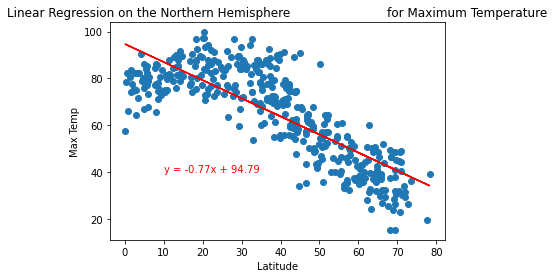

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


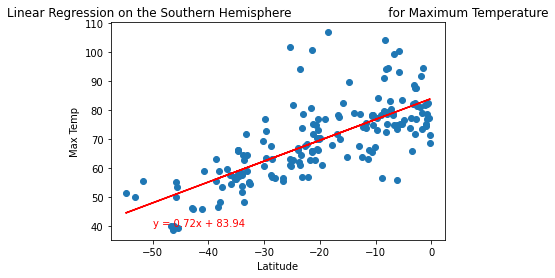

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,40))

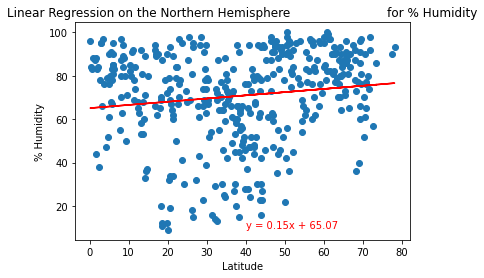

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


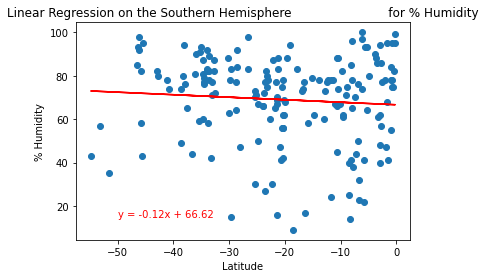

In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

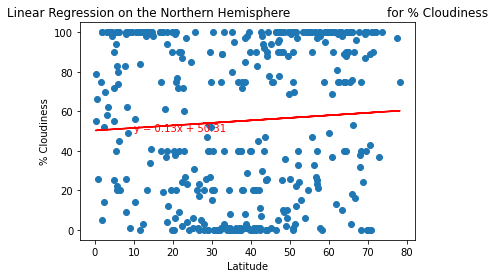

In [79]:
# Skill Drill 6.4.4
# Linear regression of Cloudiness on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,50))

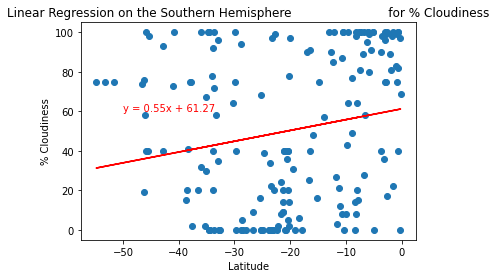

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

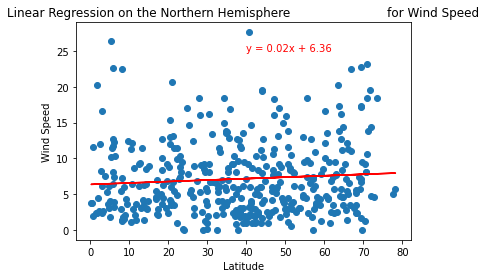

In [85]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

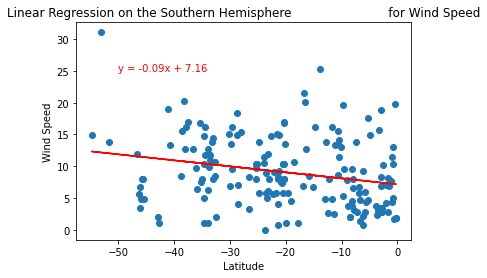

In [88]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))